# 0. EDA Process

산점도/ 회귀직선/ 히트맵

1. 1차원데이터분석 
1) 변수종류파악( 수치형/ 범주형/ 시간형) 
2) 변수종류별분석지표( 수치형/ 범주형/ 시간형) 
3) 시각화 
- 도수분포표/ 히스토그램/ 상자그림
2. 2차원데이터분석
1) 공분산/ 상관계수
2) 다중공선성확인
3) 시각화
- 산점도/ 회귀직선/ 히트맵

# 항공사 지연요인 데이터 탐색적 분석

출처 : https://www.kaggle.com/datasets/pitterman/airline-stats

pc - 퍼센트

- pct_carrier_delay (항공사 지연 비율) 
항공사의 책임으로 인한 지연의 비율을 나타냅니다.
예를 들어, 항공기 정비, 승무원 스케줄 문제, 수하물 처리 지연 등이 포함될 수 있습니 다- .
pct_atc_delay (항공 교통 관제 지연  비율)
ATC(Air Traffic Control) 즉, 항공 교통 관제로 인한 지연의 비율입니다.
공항 혼잡, 항로 제한, 관제 시스템 문제 등으로 인한 지연이 이에 해당- 합니다.
pct_weather_delay (기상  지연 비율)
날씨 조건으로 인한 지연의 비율을 나타냅니다.
폭풍, 안개, 강풍, 폭설 등 악천후로 인한 지연이 다.여기에 포함됩니

In [1]:
import pandas as pd
import numpy as np

## 1.변주 탐색

- 범주형 변수 : airline
- 수치형 변수 : carrier_delay.atc_delay,weather_delay 변수, 퍼센트

In [2]:
df = pd.read_csv("data/airline_stats.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33468 entries, 0 to 33467
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pct_carrier_delay  33440 non-null  float64
 1   pct_atc_delay      33440 non-null  float64
 2   pct_weather_delay  33440 non-null  float64
 3   airline            33468 non-null  object 
dtypes: float64(3), object(1)
memory usage: 1.0+ MB


In [3]:
df['airline'].unique()

array(['American', 'Alaska', 'Jet Blue', 'Delta', 'United', 'Southwest'],
      dtype=object)

In [4]:
df['airline'].value_counts()

airline
Delta        9107
American     5725
Southwest    5584
United       5426
Alaska       3851
Jet Blue     3775
Name: count, dtype: int64

## 2.수치형 변수의 통계량 확인

In [5]:
df.describe()

,pct_carrier_delay,pct_atc_delay,pct_weather_delay
count,33440.000000,33440.000000,33440.000000
mean,7.041475,5.089962,0.684776
std,4.497596,4.718647,1.073743
min,0.000000,0.000000,0.000000
25%,4.145455,2.146565,0.000000
50%,6.356893,3.900000,0.316002
75%,9.140474,6.630238,0.935161
max,100.000000,100.000000,33.333333


In [12]:
#항공사 별 기술통계량 확인
df.groupby('airline').pct_carrier_delay.describe().reset_index()

,airline,count,mean,std,min,25%,50%,75%,max
0,Alaska,3851.0,3.521889,2.483224,0.0,1.935484,3.225806,4.685599,22.290323
1,American,5723.0,9.042180,4.139067,0.0,6.338538,8.428571,10.988763,50.000000
2,Delta,9095.0,6.333460,4.695292,0.0,3.813989,5.548387,7.821952,100.000000
3,Jet Blue,3773.0,8.081843,3.797737,0.0,5.341176,7.657895,10.280000,28.000000
4,Southwest,5584.0,7.521997,3.345085,0.0,5.070294,6.960930,9.354839,24.800000
5,United,5414.0,7.398833,5.369283,0.0,4.034708,6.445210,9.633110,100.000000


항공사 요인
평균 American 9.04 / Jeb Blue 8.08
표준편차 가장 큰 항공사 United 5.36

In [15]:
df.groupby('airline').describe()

pct_carrier_delay                                               \
                      count      mean       std  min       25%       50%   
airline                                                                    
Alaska               3851.0  3.521889  2.483224  0.0  1.935484  3.225806   
American             5723.0  9.042180  4.139067  0.0  6.338538  8.428571   
Delta                9095.0  6.333460  4.695292  0.0  3.813989  5.548387   
Jet Blue             3773.0  8.081843  3.797737  0.0  5.341176  7.657895   
Southwest            5584.0  7.521997  3.345085  0.0  5.070294  6.960930   
United               5414.0  7.398833  5.369283  0.0  4.034708  6.445210   

                                 pct_atc_delay            ...            \
                 75%         max         count      mean  ...       75%   
airline                                                   ...             
Alaska      4.685599   22.290323        3851.0  5.472672  ...  7.001330   
American   10.988763   50.000000        5723.0  5.993529  ...  7.594450   
Delta       7.821952  100.000000        9095.0  4.462978  ...  5.839901   
Jet Blue   10.280000   28.000000        3773.0  7.345231  ...  9.612903   
Southwest   9.354839   24.800000        5584.0  3.147019  ...  3.790421   
United      9.633110  100.000000        5414.0  5.348133  ...  7.030109   

                      pct_weather_delay                                     \
                  max             count      mean       std  min       25%   
airline                                                                      
Alaska      54.838710            3851.0  0.513497  1.136494  0.0  0.000000   
American    60.000000            5723.0  1.122920  1.097811  0.0  0.296719   
Delta      100.000000            9095.0  0.680765  1.093255  0.0  0.000000   
Jet Blue    40.986111            3773.0  0.465327  0.764147  0.0  0.000000   
Southwest   21.542722            5584.0  0.512611  0.649631  0.0  0.105675   
United     100.000000            5414.0  0.680697  1.338433  0.0  0.000000   

                                          
                50%       75%        max  
airline                                   
Alaska     0.000000  0.497395  14.633803  
American   0.884354  1.641725  12.500000  
Delta      0.316406  0.893346  20.500000  
Jet Blue   0.157312  0.666667   9.923077  
Southwest  0.305598  0.663306   6.240987  
United     0.263780  0.861395  33.333333  

[6 rows x 24 columns]

## 3.결측치 확인

각 변수별로 28건의 결측치 확인

In [25]:
df.isnull().sum()

pct_carrier_delay    28
pct_atc_delay        28
pct_weather_delay    28
airline               0
dtype: int64

## 4.시각적 분석

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'weather_today')

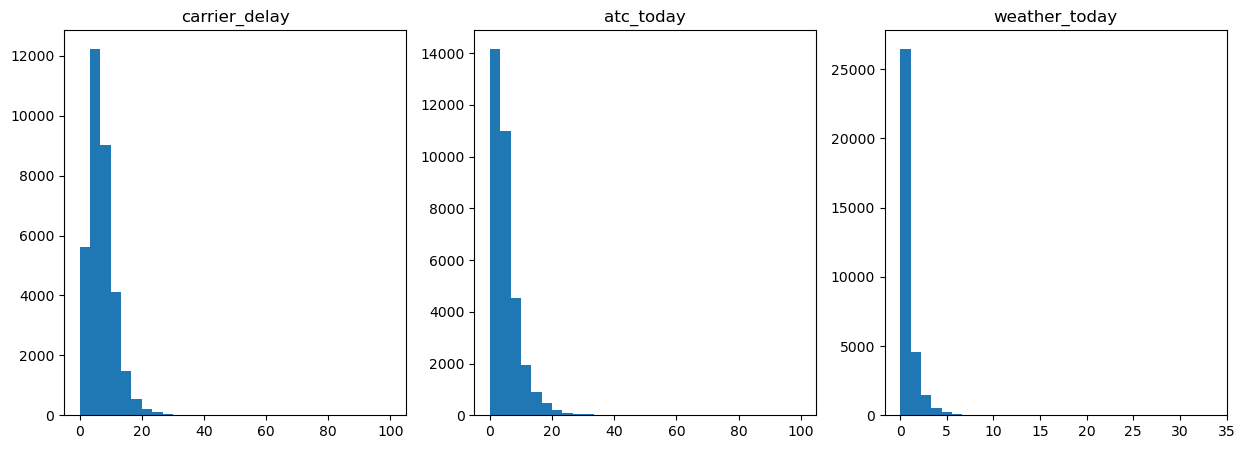

In [40]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

ax1.hist(df['pct_carrier_delay'], bins=30)
ax2.hist(df['pct_atc_delay'], bins=30)
ax3.hist(df['pct_weather_delay'], bins=30)

ax1.set_title('carrier_delay')
ax2.set_title('atc_today')
ax3.set_title('weather_today')

지연 유형별 중앙값,사분위수,이상치 확인

1)항공사 지연 : 20% 이상인 경우 이상치로 판단, 100% 육박하는 극단적 지연율 포함
2)ATC 지연 :  항공사 지연보다 낮은 표준에서 이상치로 판단, 100%인 극단적 지역 있으나 항공사 지연보단 빈번하지 않음
3)날씨 지연 : 중앙값, IQM 자체가 작음, 이상치가 20이상 인 경우, 다른 요인들에 비해 상대적으로 빈번하지 않음

<Axes: >

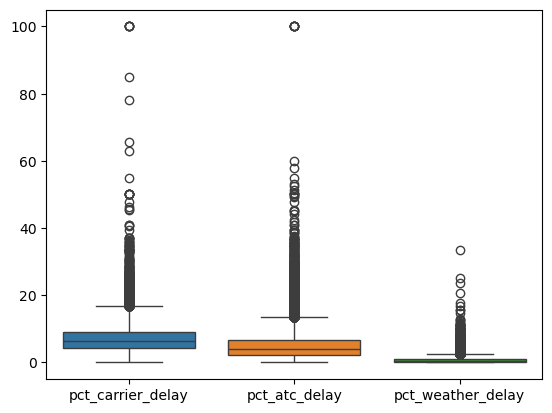

In [41]:
sns.boxplot(data=df)

항공사별 지연요인을 항공사별로 분석하면 <br>
Delta,United가 중앙값은 다른 항공사에 비해 크지 않으나, 이상치가 많이 보임
Southwest 중앙값과 최고 이상치의 차이가 제일 적다
Alaska가 최고 이상치가 가장 낮음

<Axes: xlabel='airline', ylabel='pct_carrier_delay'>

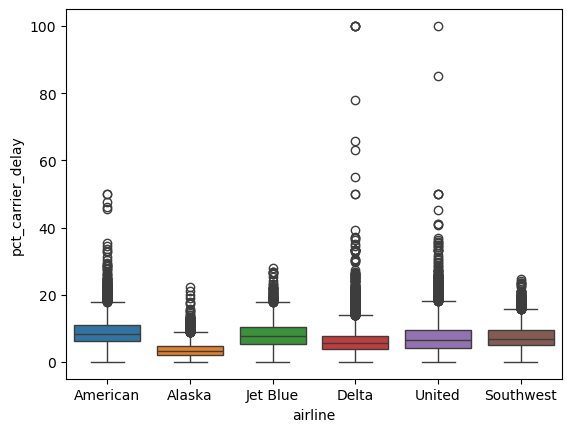

In [95]:
#항공사별로 상자그림- 항공사별 요인
sns.boxplot(data=df, x = 'airline', y='pct_carrier_delay',hue='airline')

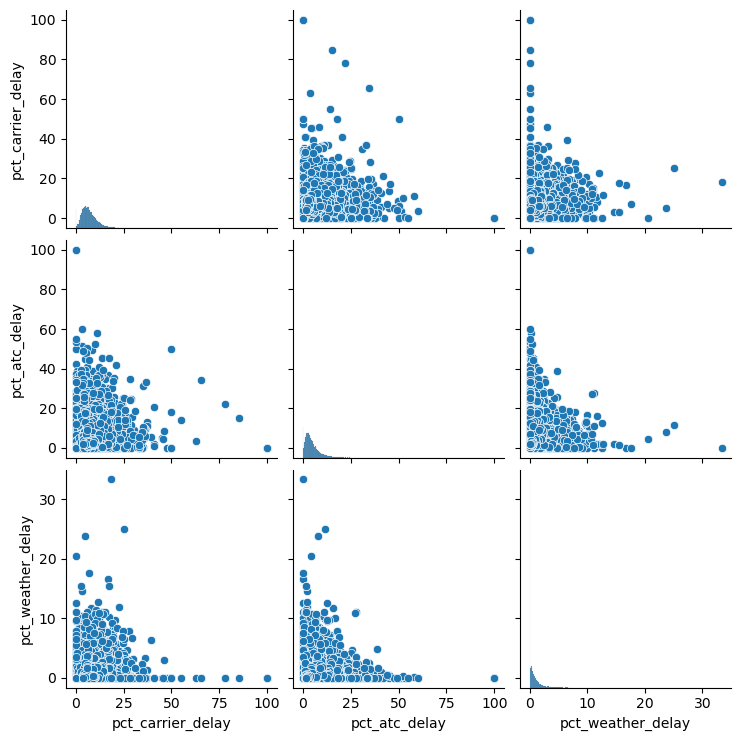

In [53]:
sns.pairplot(data=df)

In [55]:
# 상관관계 시각화

1.항공사 요인 vs ATC 요인 간 상관계수 0.14. 약한 상관관계.
2.항공사 요인 vs 날씨 요인 간 상관계수 0.16, 약한 상관관계가 있음을 확인,항공사 지연 발생시 기상 지연도 발생할 수 있음을 의미, 상당부분 두 지연요인은 독립적으로 발생하는 것으로 보임
3.ATC요인 vs 날씨 요인은 상관계수 0.092 거의 상관 없다 볼 수 있음, 서로 독립적으로 발생하는 경향 보임

상관 행렬 correlation matrix

상관 행렬은 여러 변수 간의 상관관계를 보여주는 표입니다. 주요 특징은 다음과 같습니다:1. 
정의:- 
데이터셋의 여러 변수들 사이의 상관계수를 표 형태로 나타낸 것입니다- .
각 셀은 두 변수 간의 상관계수를 나타냅

2. 다.
- 구조:
정사각 행렬 형태- 입니다.
대각선 요소는 항상 1입니다 (변수와 자기 자신의 상
3. 관관계)- .
해석:
상관계수는 -1에서 +1 사이의 값- 을 가집니다.
+1은 완벽한 양의 상관관계, -1은 완벽한 음의 상관관계, 0은 선형 상관관계 없
음4. 을 의미합니다.
용도:
복잡한 데이터셋을 요약하고 변수 간 관계를 파악하는 데 사용됩니다.
데이터 과학, 금융, 시장 조사 등 다양한 분야에서 활용됩니다.
계산:
일반적으로 피어슨 상관계
수5. 를 사용하여 계산합니다.
공식: r = (nΣXY – ΣXΣY) / sqrt((nΣX^2 – (ΣX)^2)(nΣY^2 – (ΣY)^2))
시각화:
히트맵 형태로 자주 표현되어 직관적인 이해를 돕습니다.
상관 행렬은 데이터 분석의 초기 단계에서 변수 간 관계를 빠르게 파악하는 데 매우 유용한 도구입니다.

In [96]:
cor_matrix = df.corr(numeric_only=True) #숫자형 열 간의 상관관계 계산
cor_matrix 

,pct_carrier_delay,pct_atc_delay,pct_weather_delay
pct_carrier_delay,1.000000,0.144474,0.161474
pct_atc_delay,0.144474,1.000000,0.091729
pct_weather_delay,0.161474,0.091729,1.000000


<Axes: >

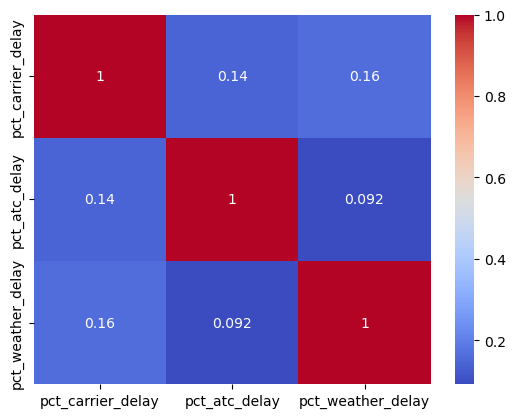

In [63]:
sns.heatmap(cor_matrix, annot=True, cmap = 'coolwarm' )
#annot=True -> 각 셀에 상관계수 값이 숫자로 표시

## 5.결측치 처리

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33468 entries, 0 to 33467
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pct_carrier_delay  33440 non-null  float64
 1   pct_atc_delay      33440 non-null  float64
 2   pct_weather_delay  33440 non-null  float64
 3   airline            33468 non-null  object 
dtypes: float64(3), object(1)
memory usage: 1.0+ MB


In [87]:
df.isnull().sum()

pct_carrier_delay    28
pct_atc_delay        28
pct_weather_delay    28
airline               0
dtype: int64

In [88]:
df_cleaned = df.dropna()
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33440 entries, 0 to 33467
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pct_carrier_delay  33440 non-null  float64
 1   pct_atc_delay      33440 non-null  float64
 2   pct_weather_delay  33440 non-null  float64
 3   airline            33440 non-null  object 
dtypes: float64(3), object(1)
memory usage: 1.3+ MB


In [93]:
#결측치 제거된 데이터로 시각적 분석, 상관관계 분석 수행
#제거 전 버전과 차이가 없음!

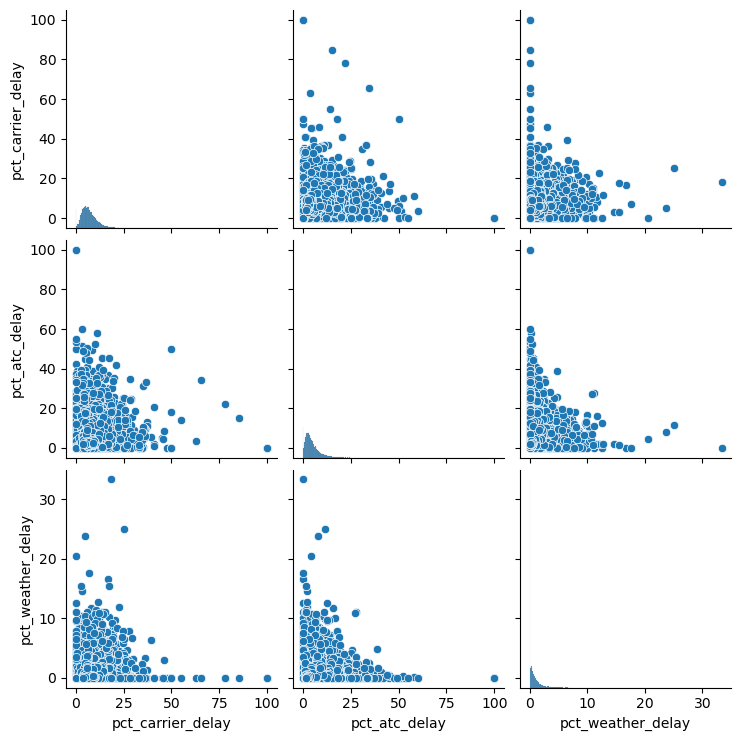

In [90]:
sns.pairplot(data=df_cleaned)

<Axes: >

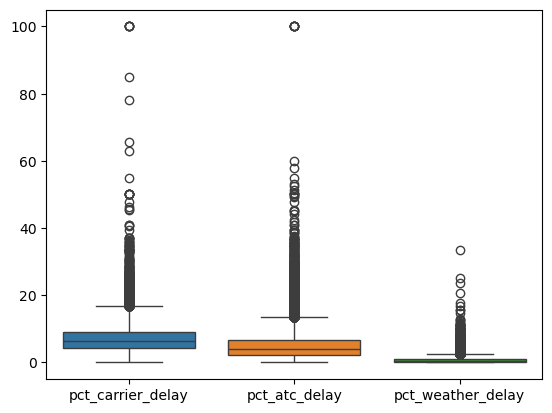

In [72]:
sns.boxplot(data=df_cleaned)

In [80]:
df_cleaned = cor_matrix

sns.heatmap(cor_matrix, annot=True, cmap = 'coolwarm' )


pct_carrier_delay                                        235466.910117
pct_atc_delay                                            170208.315141
pct_weather_delay                                          22898.89433
airline              AmericanAmericanAmericanAmericanAmericanAmeric...
dtype: object

In [98]:
cor_matrix = df_cleaned.corr(numeric_only=True)

<Axes: >

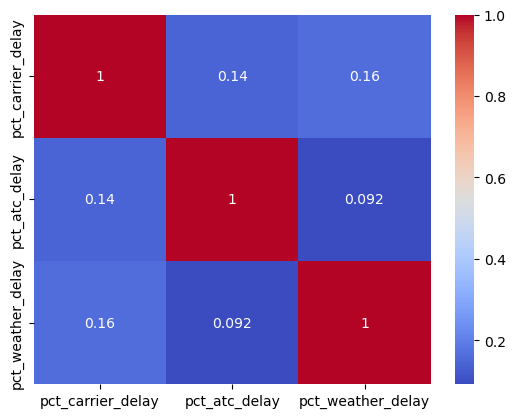

In [99]:
sns.heatmap(cor_matrix, annot=True, cmap = 'coolwarm' )